In [1]:
# Importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

In [15]:
# Carregar a base de dados

path = kagglehub.dataset_download("gautamdeora7/food-delivery-time-a-multi-factor-dataset")
os.environ['KAGLE_CONFIG_DIR'] = '/content'
print("Path to dataset files:", path)
os.listdir(path)

Path to dataset files: /root/.cache/kagglehub/datasets/gautamdeora7/food-delivery-time-a-multi-factor-dataset/versions/1


['Food_Time_Data_Set.csv']

In [16]:
path = '/root/.cache/kagglehub/datasets/gautamdeora7/food-delivery-time-a-multi-factor-dataset/versions/1'
df = pd.read_csv(path + '/Food_Time_Data_Set.csv')

## Propriedades dos dados:

In [6]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64
 13  weather_descript

In [8]:
df.isnull().sum()

,0
ID,1
Delivery_person_ID,1
Delivery_person_Age,1
Delivery_person_Ratings,1
Restaurant_latitude,1
Restaurant_longitude,1
Delivery_location_latitude,1
Delivery_location_longitude,1
Type_of_order,1
Type_of_vehicle,1


## Explorando os dados:

In [17]:
# Como Unnamed: 14 possui apenas nulos vamos remover

df = df.drop(columns=['Unnamed: 14'])

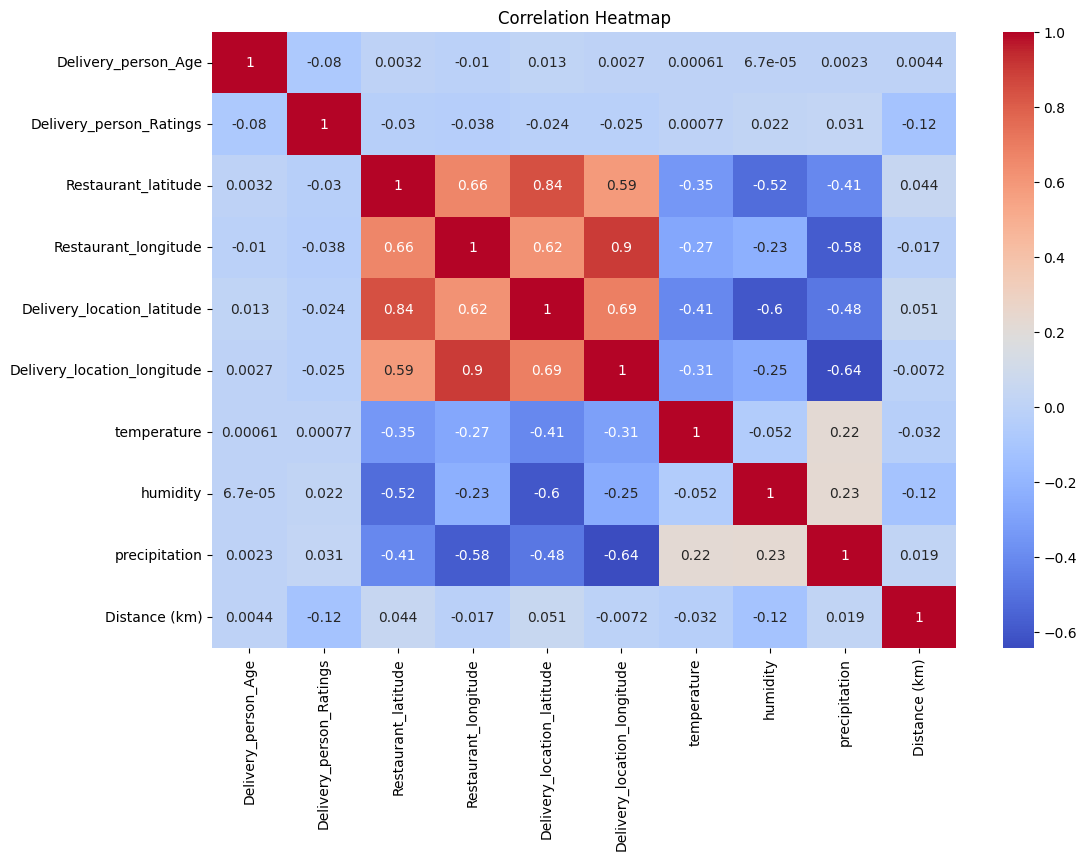

In [18]:
# Gerando mapa de calor

numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

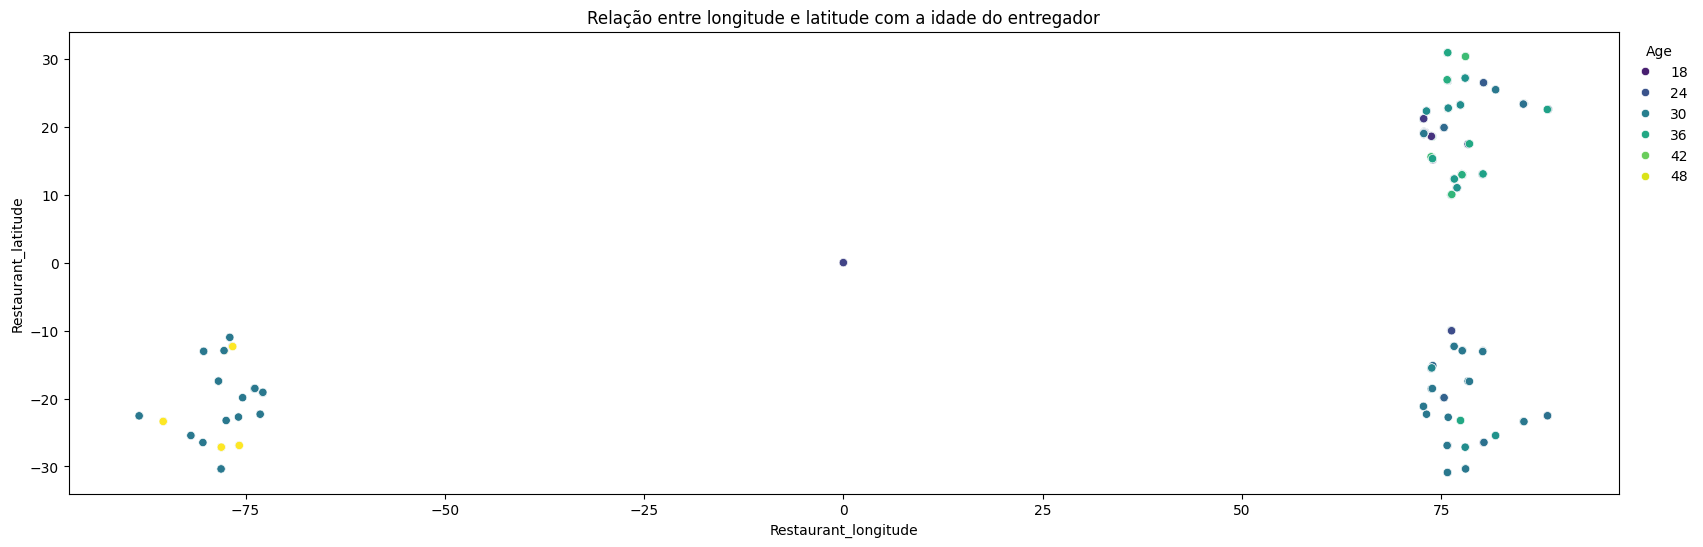

In [11]:
# Verificando a relação entre as variáveis

plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Restaurant_longitude', y='Restaurant_latitude', hue='Delivery_person_Age', palette='viridis')
plt.title('Relação entre longitude e latitude com a idade do entregador')
plt.xlabel('Restaurant_longitude')
plt.ylabel('Restaurant_latitude')
plt.legend(title='Age', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

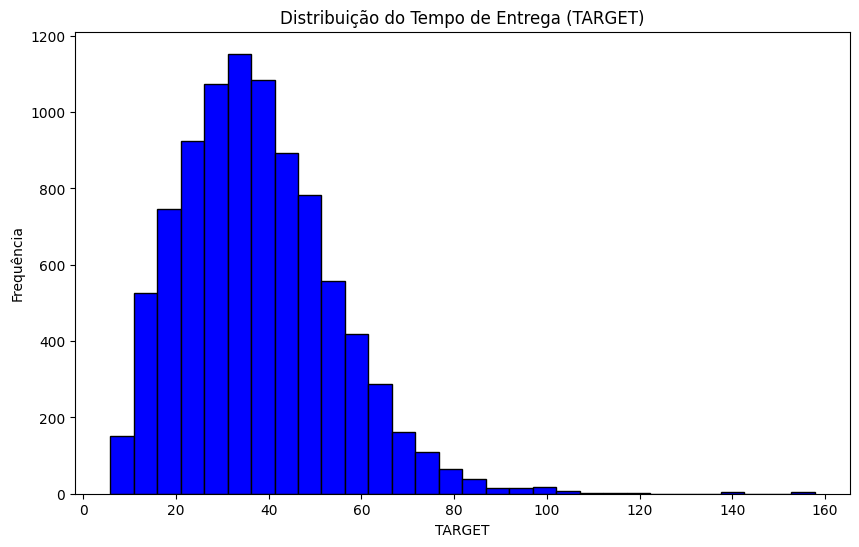

In [26]:
#O gráfico mostra a frequência de tempo nas entregas, observamos que a maioria
#das entregas é feita em 20 a 40 minutos e o tempo máximo é proximo a 160 min

df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')

df.dropna(subset=['TARGET'], inplace=True)

plt.figure(figsize=(10, 6))
plt.hist(df['TARGET'], bins=30, color='blue', edgecolor='black')
plt.title('Distribuição do Tempo de Entrega (TARGET)')
plt.xlabel('TARGET')
plt.ylabel('Frequência')
plt.show()

## Analise dos outliers:

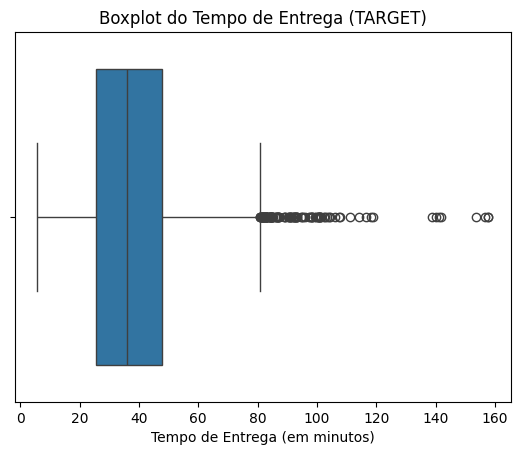

In [31]:
# Reforçamos a ideia do tempo de entrega e temos a visualização dos valores mais atípicos de entrega

sns.boxplot(x=df['TARGET'])
plt.title('Boxplot do Tempo de Entrega (TARGET)')
plt.xlabel('Tempo de Entrega (em minutos)')
plt.show()

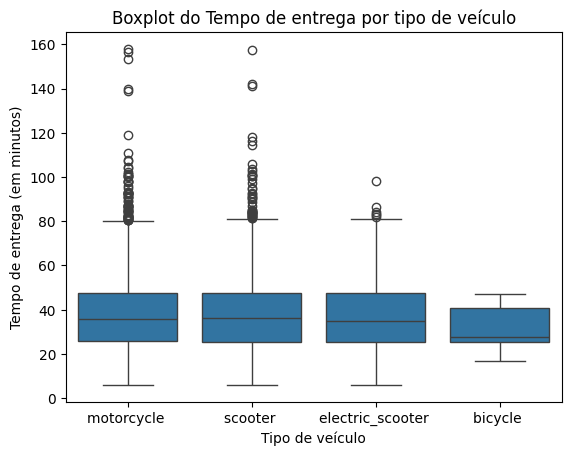

In [29]:
# O tempo de entrega para cada tipo de veiculo, bicicleta é o mais consistente

sns.boxplot(data=df, x='Type_of_vehicle', y='TARGET')
plt.title('Boxplot do Tempo de entrega por tipo de veículo')
plt.xlabel('Tipo de veículo')
plt.ylabel('Tempo de entrega (em minutos)')
plt.show()

In [32]:
# Verificando Outliers

Q1 = df['TARGET'].quantile(0.25)
Q3 = df['TARGET'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['TARGET'] < (Q1 - 1.5 * IQR)) | (df['TARGET'] > (Q3 + 1.5 * IQR))]
print(outliers[['ID', 'TARGET']])  # Exibe os outliers


        ID      TARGET
1     B379   85.266667
8     1102   81.783333
22    B816  101.000000
51    25FD   80.750000
63    BE80   85.833333
...    ...         ...
9206  BDBF   84.350000
9316  269D   84.883333
9537  166E   92.533333
9543  3A66   97.283333
9746  5636  103.500000

[116 rows x 2 columns]


In [34]:
# Exibindo os registros com outliers
outliers_detail = df[df['TARGET'].isin(outliers['TARGET'])]
print(outliers_detail[['ID', 'Delivery_person_Age', 'Type_of_vehicle', 'Distance (km)', 'Traffic_Level', 'TARGET']])


        ID  Delivery_person_Age Type_of_vehicle  Distance (km) Traffic_Level  \
1     B379                 34.0        scooter           37.17     Very High   
8     1102                 22.0     motorcycle           31.62     Very High   
22    B816                 33.0        scooter           27.52     Very High   
51    25FD                 31.0        scooter           26.36     Very High   
63    BE80                 33.0     motorcycle           35.56     Very High   
...    ...                  ...             ...            ...           ...   
9206  BDBF                 36.0     motorcycle           29.90     Very High   
9316  269D                 30.0     motorcycle           35.89     Very High   
9537  166E                 33.0        scooter           34.81     Very High   
9543  3A66                 24.0        scooter           51.16     Very High   
9746  5636                 31.0        scooter           42.60     Very High   

          TARGET  
1      85.266667  
8

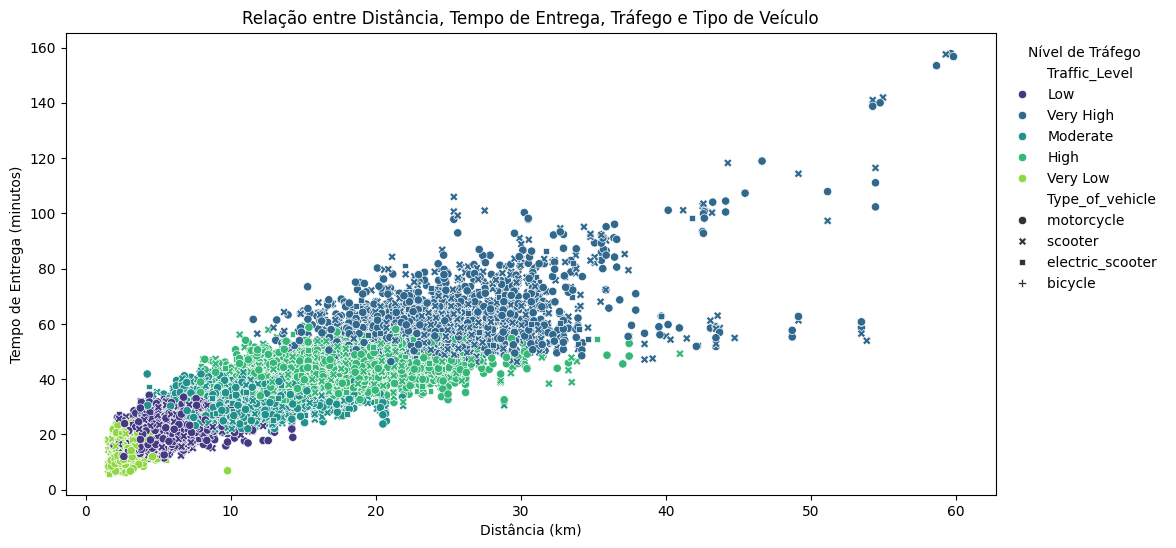

In [36]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Distance (km)', y='TARGET', hue='Traffic_Level', style='Type_of_vehicle', palette='viridis')
plt.title('Relação entre Distância, Tempo de Entrega, Tráfego e Tipo de Veículo')
plt.xlabel('Distância (km)')
plt.ylabel('Tempo de Entrega (minutos)')
plt.legend(title='Nível de Tráfego', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()


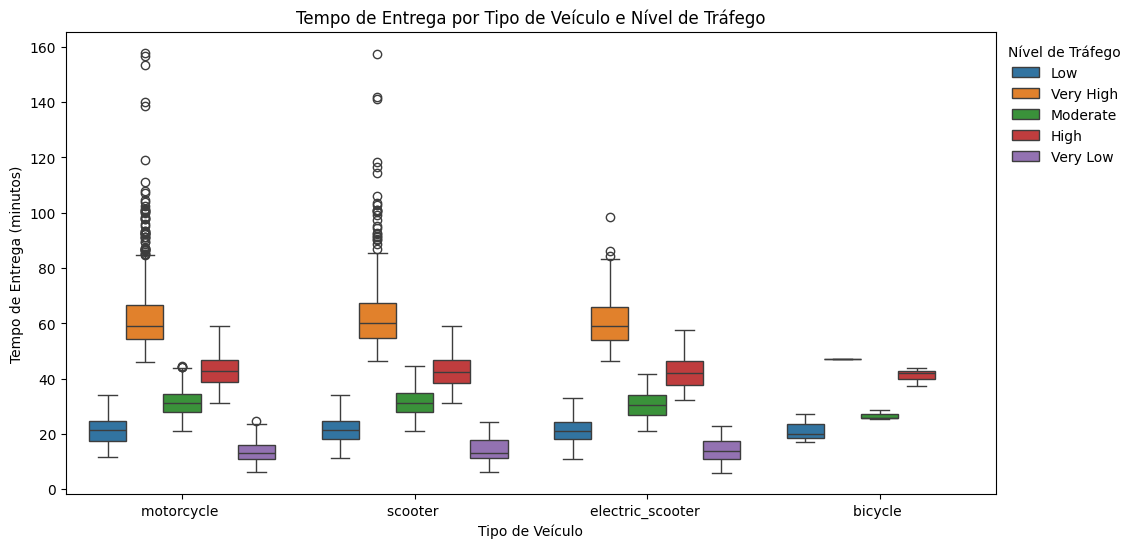

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type_of_vehicle', y='TARGET', hue='Traffic_Level')
plt.title('Tempo de Entrega por Tipo de Veículo e Nível de Tráfego')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Tempo de Entrega (minutos)')
plt.legend(title='Nível de Tráfego', loc='upper left', bbox_to_anchor=(1, 1), frameon=False, fontsize=10)
plt.show()

## Módelo preditivo com base em distância, tipo de veículo e nível de tráfego

In [40]:
df.dropna(subset=['TARGET', 'Distance (km)', 'Traffic_Level'], inplace=True)

In [41]:
# Convertendo o tipo de veículo para variáveis numéricas
vehicle_mapping = {'scooter': 1, 'motorcycle': 2}
df['Type_of_vehicle_numeric'] = df['Type_of_vehicle'].map(vehicle_mapping)

# Convertendo o nível de tráfego para variáveis numéricas
traffic_mapping = {'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4}
df['Traffic_Level_numeric'] = df['Traffic_Level'].map(traffic_mapping)


In [42]:
# Selecionando variáveis relevantes
X = df[['Distance (km)', 'Type_of_vehicle_numeric', 'Traffic_Level_numeric', 'Delivery_person_Age']]
y = df['TARGET']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Substituir valores ausentes pela média

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Type_of_vehicle_numeric']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Instanciando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo com os dados de treino
model.fit(X_train, y_train)


LinearRegression()

In [47]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando o R² e o MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"Erro Quadrático Médio (MSE): {mse:.3f}")


R²: 0.771
Erro Quadrático Médio (MSE): 59.600
